# Shark attack quest

In [28]:
import pandas as pd
import re

df = pd.read_excel("GSAF5.xls")

df["id"] = range(0, len(df))

df_time = df[["id", "Time"]]

df_time["Time"].unique()


array(['1600hr', nan, '11.30hr', '1100hr', '1735hr', '11hr15', '16hr15',
       '?', '13h15', '9h', 1300, '14h', '15h30', 'Not stated', '13h30',
       '9h15', 'Not advised', '13h40', '12h30', '16h00', '11h30', '06h30',
       '20h00', '13h00', '11h12', '16h30', '15h00', '02h00', '09h15',
       'Early Morning', '16h32', '11h00', 'Morning', '10h30', '13h20',
       '14h00', '09h00', '10h20', '15h05', '17h00', '15h45', '07h45',
       '10h40', '07h50', '01h00', '10h00', 'Afternoon', '19h30',
       'Evening', '17h50', '09h30', '08h45', '"Midday"', '16h25', '13h55',
       '13h50', '17h20', '13h45', '10h10', '14h35', 'Night', '1500h ',
       '19h15', '11h20', '07h15', '07h00', '18h00', '08h00', '14h20',
       '17h30', '07h20', '14h50', '-16h30', '12h00', '17h17', '11h15',
       '19h00', '07h53', '16h10', '11h17', '17h45', '10jh45',
       'Early  morning', '13h12', '07h30', '11hoo', '11h43', '10h15',
       '14h09', '12h15', '19h12', '15h20', '16h40', '11h24', '12h50',
       '07h31',

In [29]:
# Cleaning
  ## 14h35 --> 5 elements, 2 digits, 1 letter, 2 digits

df_time['cleaned_time'] = df_time['Time'].str.lower()   # make everything lowercase

df_time['cleaned_time'] = df_time['cleaned_time'].str.replace(r'-(\d{1,10})', r'\1', regex=True)    # remove - from the begining



df_time['cleaned_time'] = df_time['cleaned_time'].str.replace("hoo", "h00", regex=True)   # replace hoo for h00
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace(r'(\d{2}).{0,5}(\d{2})', r'\1\2', regex=True)    # Replace pattern of 2 digits, separator, and 2 digits, for 4 digits
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace(r'(\d{4})h', r'\1', regex=True)    # Remove h at the end
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace(r'(\d{4})hr', r'\1', regex=True)    # Remove hr at the end
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace(r'(\d{4})h00', r'\1', regex=True)    # Remove hrOO at the end



df_time['cleaned_time'] = df_time['cleaned_time'].str.replace('midday', '1200')    # Replace Midday for 1200
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace('morning', '0900')    # Replace Morning for 0900
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace('early  morning', '0900')    # Replace Early morning for 0900
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace('afternoon', '1600')    # Replace Afternoon for 1600
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace('after noon', '1600')    # Replace Afternoon for 1600

df_time['cleaned_time'] = df_time['cleaned_time'].str.replace('evening', '1800')    # Replace Evening for 1800
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace('night', '2200')    # Replace Night for 2200
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace('dusk', '2000')    # Replace Dusk for 2200
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace('early afternoon', '2000')    # Replace Early afternoon for 2000

df_time['cleaned_time'] = df_time['cleaned_time'].str.replace(r'shortly before (\d{0,6})', r'\1', regex=True)    # Remove shortly after
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace(r'(\d{4}) \/ (\d{4})', r'\1', regex=True)    # When date has two hours(ex: 1000 / 1200), get the first one
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace(r'((?:\b\w+\b\s?)+(\d{4})/gm)', r'\2', regex=True)    # When date 2 words before time(ex: early before 1000), get the first one
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace(r'(\w+(\d{4}))', r'\1', regex=True)    # When time has a word before time
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace(r'(\d{4})00', r'\1', regex=True)    # When time is 185600, do 1856
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace(r'(\d{4})r', r'\1', regex=True)    # When time is 1862r, remove r
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace(r'"(\d{4})"', r'\1', regex=True)    # When time is 1862r, remove r
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace(r'(\d{1,2})h(\d{2})', r'\1', regex=True)   # clean 9h00
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace(r'(before \d{4})', r'\1', regex=True)
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace(r'(\d{4}) - \d{4}', r'\1', regex=True)
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace(r'(\d{4}) -- \d{4}', r'\1', regex=True)
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace(r'before (\d{4})', r'\1', regex=True)
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace(r'mid(\d{4})', r'\1', regex=True)
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace(r'after (\d{4})', r'\1', regex=True)

df_time['cleaned_time'] = df_time['cleaned_time'].str.replace(r'early (\d{4})', r'\1', regex=True)
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace(r'sometime between (\d{4}) & \d{4}', r'\1', regex=True)
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace('just before noon', '1145')
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace(r'late (\d{4}) & \d{4}', r'\1', regex=True)
df_time['cleaned_time'] = df_time['cleaned_time'].str.replace(r'\d{2}(\d{4})', r'\1', regex=True)



df_time["cleaned_time"].unique()


C:\Users\xavie\AppData\Local\Temp\ipykernel_14768\3287212167.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['cleaned_time'] = df_time['Time'].str.lower()   # make everything lowercase
C:\Users\xavie\AppData\Local\Temp\ipykernel_14768\3287212167.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['cleaned_time'] = df_time['cleaned_time'].str.replace(r'-(\d{1,10})', r'\1', regex=True)    # remove - from the begining
C:\Users\xavie\AppData\Local\Temp\ipykernel_14768\3287212167.py:10: Setti

array(['1600', nan, '1130', '1100', '1735', '1115', '1615', '?', '1315',
       '9h', '14h', '1530', 'not stated', '1330', '9', 'not advised',
       '1340', '1230', '0630', '2000', '1300', '1112', '1630', '1500',
       '0200', '0915', '0900', '1632', '1030', '1320', '1400', '1020',
       '1505', '1700', '1545', '0745', '1040', '0750', '0100', '1000',
       '1930', '1800', '1750', '0930', '0845', '1200', '1625', '1355',
       '1350', '1720', '1345', '1010', '1435', '2200', '1500 ', '1915',
       '1120', '0715', '0700', '0800', '1420', '1730', '0720', '1450',
       '1717', '1900', '0753', '1610', '1117', '1745', '1045',
       'early  0900', '1312', '0730', '1143', '1015', '1409', '1215',
       '1912', '1520', '1640', '1124', '1250', '0731', '1445', '1920',
       '1145', '0640', '`1700', '0751', '1146', '2030', '1223', '0707',
       '1639', '1557', '1430', '1645', '0815', '0856', '1540', '1830',
       '0758', '1740', '0910', '1710', '0936', '0840', '0600', 'sunset',
       '14

In [30]:
# Count how many strings have exactly 4 digits
print(f"Total lenght: {df_time.shape[0]}")
print(f"Total cleaned rows: {df_time['cleaned_time'].str.match(r'^\d{4}$').sum()}")
print(f"Missing values: {df_time['cleaned_time'].isnull().sum()}")
print(f"Potentially fixable: {df_time.shape[0] - df_time['cleaned_time'].str.match(r'^\d{4}$').sum() - df_time['cleaned_time'].isnull().sum()} more")

Total lenght: 6970
Total cleaned rows: 3283
Missing values: 3531
Potentially fixable: 156 more


In [31]:
# filter when it has 4 digits
filtered_df_time = df_time[df_time['cleaned_time'].str.match(r'^\d{4}$', na=False)]
filtered_df_time["cleaned_time"] = filtered_df_time["cleaned_time"].astype(int)
filtered_df_time

C:\Users\xavie\AppData\Local\Temp\ipykernel_14768\2772734006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_time["cleaned_time"] = filtered_df_time["cleaned_time"].astype(int)


,id,Time,cleaned_time
0,0,1600hr,1600
2,2,11.30hr,1130
3,3,1100hr,1100
4,4,1735hr,1735
5,5,11hr15,1115
...,...,...,...
6896,6896,Morning,900
6909,6909,Afternoon,1600
6910,6910,Afternoon,1600
6911,6911,Afternoon,1600


In [32]:
type(filtered_df_time["cleaned_time"][6])

numpy.int32

In [33]:
filtered_df_2 = filtered_df_time[["id", "cleaned_time"]].sort_values("cleaned_time")
filtered_df_2

,id,cleaned_time
2392,2392,30
5857,5857,100
6255,6255,100
68,68,100
544,544,100
...,...,...
461,461,2300
4029,4029,2300
4255,4255,2330
701,701,2330


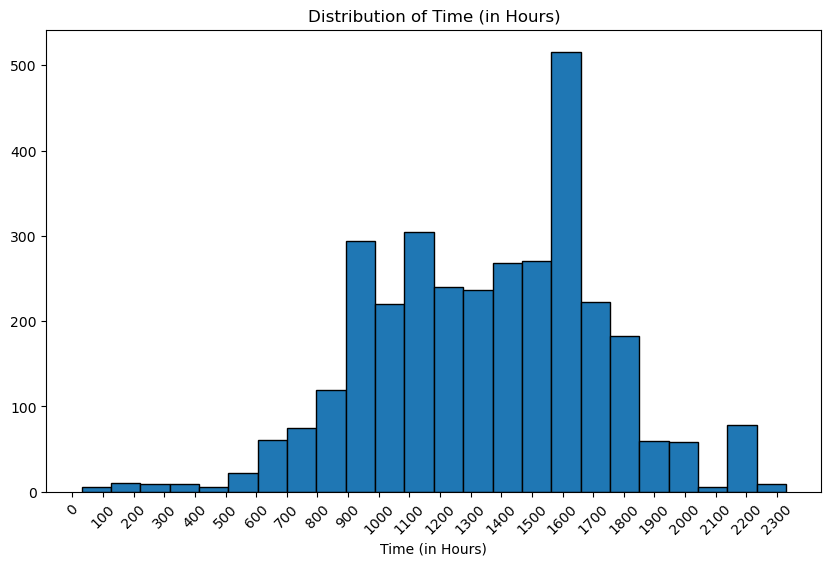

In [34]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

plt.figure(figsize=(10, 6))
plt.hist(filtered_df_2['cleaned_time'].sort_values(), bins = 24, edgecolor='black')
plt.title('Distribution of Time (in Hours)')
plt.xlabel('Time (in Hours)')

# Set the custom x-axis ticks and labels
ax = plt.gca()  # Get the current axis

# Set the positions of the custom labels (these should match the scale of your data)
custom_labels = range(0, 2400, 100)
ax.set_xticks(custom_labels)  # Use the custom labels as the tick positions

# Optionally, you can also set custom labels to be displayed, in case the label format differs
ax.set_xticklabels(custom_labels)

plt.xticks(rotation=45)


plt.show()


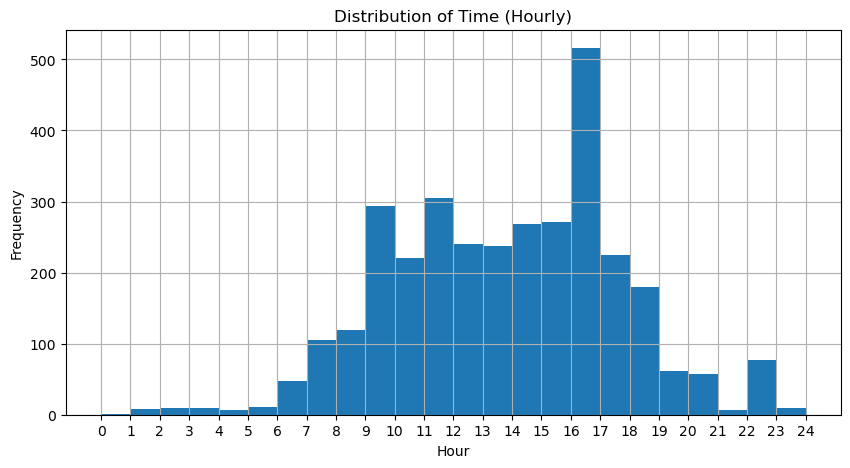

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the times to hours for binning
def time_to_hours(t):
    # Convert times like 1530 -> 15.5 (15 hours and 30 minutes)
    hours = t // 100
    minutes = (t % 100) / 60
    return hours + minutes

# Convert all times in the list to hour-based format
time_in_hours = [time_to_hours(t) for t in filtered_df_2["cleaned_time"]]

# Create bins for each hour (0 to 24, meaning 0:00-1:00, 1:00-2:00, etc.)
bins = range(0, 25)  # Bins from 0 to 24 (24-hour format)

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.hist(time_in_hours, bins=bins)
plt.title('Distribution of Time (Hourly)')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.xticks(bins)  # Set x-axis ticks at each hour
plt.grid(True)
plt.show()


In [36]:
filtered_df_2.to_csv(r"C:\Users\xavie\OneDrive\Documentos\Ironhack\Week 2\Quest\clean_time.csv", index=False)
